In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.linalg import expm as expm
np.set_printoptions(precision=3)
plt.style.use('dark_background')

## Problem 1.3 and 1.4

In [5]:
A=np.array([[0 , 2],[-2, 0]])
I=np.eye(2)
x0=np.random.rand(2)
print('initial condition  :   %s' % x0)


h=0.1
print('step size          :   %s' % h)

NMAX=200


initial condition  :   [0.04  0.296]
step size          :   0.1


In [6]:
def feuler(xi,h=h,A=A,I=I):
    X1=I+A*h/2
    return np.dot(X1,xi)

def beuler(xi, h=h, A=A, I=I):
    X2=np.linalg.inv(I-A*h/2)
    return np.dot(X2,xi)

def fbeuler(xi,h=h,A=A, I=I):
    X1=I+A*h/2
    X2=np.linalg.inv(I-A*h/2)
    X=np.dot(X1,X2)
    return np.dot(X,xi)

In [7]:
xi=x0
xi_fb=[xi]
xi_b=[xi]
xi_f=[xi]
xin_fb=[]; xin_f=[]; xin_b=[]
for k in range(NMAX):
    xi_fb.append(fbeuler(xi_fb[k]))
    xi_b.append(beuler(xi_b[k]))
    xi_f.append(feuler(xi_f[k]))
    xin_fb.append(np.linalg.norm(xi_fb[k]))
    xin_b.append(np.linalg.norm(xi_b[k]))
    xin_f.append(np.linalg.norm(xi_f[k]))

xi_f=np.asarray(xi_f); xi_fb=np.asarray(xi_fb); xi_b=np.asarray(xi_b)

Text(0.5, 1.0, 'Backward Euler')

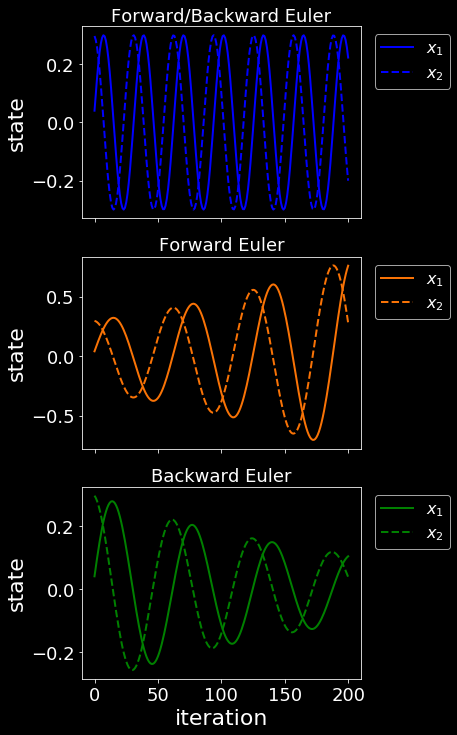

In [9]:
fig,(ax1,ax2,ax3)=plt.subplots(3,1, figsize=(5,12), sharex=True)
ax1.plot(xi_fb[:,0], c='blue',lw=2.0, label=r'$x_1$')
ax1.plot(xi_fb[:,1], '--', c='blue', lw=2.0,label=r'$x_2$')
ax2.plot(xi_f[:,0], c='xkcd:orange', lw=2.0, label=r'$x_1$')
ax2.plot(xi_f[:,1], '--',c='xkcd:orange', lw=2.0, label=r'$x_2$')
ax3.plot(xi_b[:,0], c='green', lw=2.0, label=r'$x_1$')
ax3.plot(xi_b[:,1], '--', c='green', lw=2.0, label=r'$x_2$')
ax1.legend(bbox_to_anchor=(1.35, 1.0), fontsize=16)
ax2.legend(bbox_to_anchor=(1.35, 1.0), fontsize=16)
ax3.legend(bbox_to_anchor=(1.35, 1.0), fontsize=16)
ax3.set_xlabel('iteration', fontsize=22)
ax1.set_ylabel(r'state', fontsize=22)
ax2.set_ylabel(r'state', fontsize=22)
ax3.set_ylabel(r'state', fontsize=22)
ax1.tick_params(labelsize=18)
ax2.tick_params(labelsize=18)
ax3.tick_params(labelsize=18)
ax1.set_title('Forward/Backward Euler', fontsize=18)
ax2.set_title('Forward Euler', fontsize=18)
ax3.set_title('Backward Euler', fontsize=18)

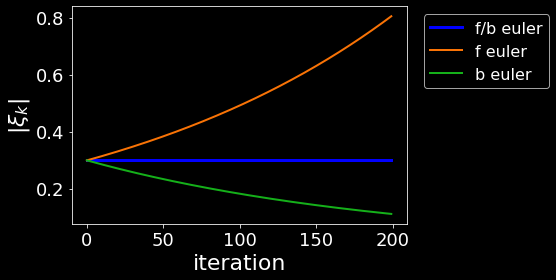

In [13]:
lw=2.0
plt.plot(xin_fb, label='f/b euler', lw=3.0, color='b')
plt.plot(xin_f, label='f euler', lw=lw, color='xkcd:orange')
plt.plot(xin_b, label='b euler', lw=lw, color='xkcd:green')
plt.legend(bbox_to_anchor=(1.45, 1.0), fontsize=16)
plt.xlabel('iteration', fontsize=22)
plt.ylabel(r'$\|\xi_k\|$', fontsize=22)
plt.tick_params(labelsize=18)

In [14]:
t=np.asarray([h*k for k in range(NMAX)])
x=[]
for t_ in t:
    x.append(np.dot(expm(A*t_),x0))

x=np.asarray(x)

Text(0, 0.5, 'state')

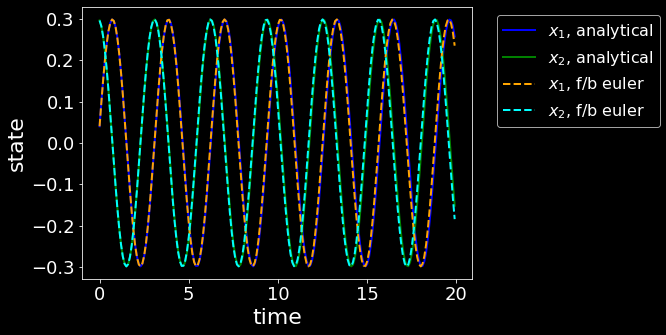

In [15]:
fig,ax1=plt.subplots(1,1, figsize=(7,5))
ax1.plot(t,xi_fb[:-1,0], c='blue',lw=2.0, label=r'$x_1$, analytical')
ax1.plot(t,xi_fb[:-1,1], c='green', lw=2.0,label=r'$x_2$, analytical')
ax1.plot(t,x[:,0], '--',c='orange', lw=2.0, label=r'$x_1$, f/b euler')
ax1.plot(t,x[:,1], '--', c='cyan', lw=2.0, label=r'$x_2$, f/b euler')
ax1.tick_params(labelsize=18)
ax1.legend(bbox_to_anchor=(1.5, 1.0), fontsize=16)
ax1.set_xlabel('time', fontsize=22)
ax1.set_ylabel('state', fontsize=22)

In [16]:
TMAX=20

errors=[]; xs=[]; xis=[]; ts=[]
for h in [0.1,0.05,0.01, 0.001]:
    NMAX=int(TMAX/h)
    xi=x0
    xi_fb=[xi]
    xin_fb=[]; xin_f=[]; xin_b=[]
    for k in range(NMAX):
        xi_fb.append(fbeuler(xi_fb[k], h=h))
        xin_fb.append(np.linalg.norm(xi_fb[k]))
    xi_fb=np.asarray(xi_fb)
    xis.append(xi_fb)
    t=np.asarray([h*k for k in range(NMAX)])
    ts.append(t)
    x=[]
    for t_ in t:
        x.append(np.dot(expm(A*t_),x0))

    x=np.asarray(x)
    xs.append(x)
    error=[]
    for x_,xi_ in zip(x,xi_fb):
        error.append(np.linalg.norm(x_-xi_))
    errors.append(error)

Text(0, 0.5, 'error')

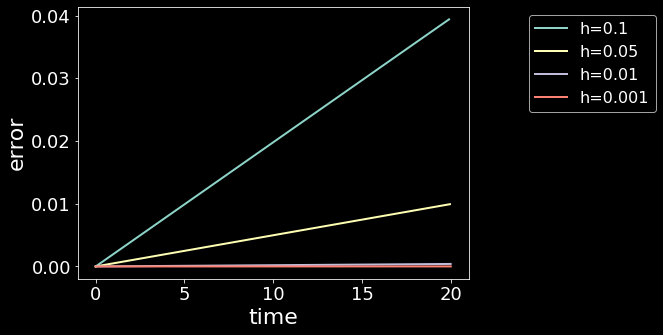

In [17]:
fig,ax1=plt.subplots(1,1, figsize=(7,5))
for i,h in enumerate([0.1,0.05,0.01, 0.001]):
    ax1.plot(ts[i],errors[i],lw=2.0, label=r'h='+str(h))
ax1.tick_params(labelsize=18)
ax1.legend(bbox_to_anchor=(1.5, 1.0), fontsize=16)
ax1.set_xlabel('time', fontsize=22)
ax1.set_ylabel('error', fontsize=22)